## 0. Code Library and Links

In [2]:
import numpy as np 
import pandas as pd 

import scipy
import seaborn

import matplotlib.pylab as plt
from matplotlib import cm

%matplotlib inline

In [7]:
import keras

In [8]:
import tensorflow.examples.tutorials.mnist as mnist

In [9]:
from keras.datasets import cifar10, imdb, boston_housing

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [11]:
from keras.preprocessing import sequence

In [12]:
from keras.utils import to_categorical

In [13]:
from keras.models import Sequential, load_model, Model

In [55]:
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D

In [15]:
from keras.layers import Dense, LSTM
from keras.layers import Activation, Flatten, Dropout
from keras.layers import Input, BatchNormalization

In [16]:
from keras.layers.advanced_activations import PReLU

## 1. Backend

In [17]:
'''
/.keras/keras.json
{"image_data_format": "channels_last",
 "epsilon": 1e-07,
 "floatx": "float32",
 "backend": "tensorflow"}
'''
''''''

''

In [18]:
# variants: "theano", "tensorflow", "cntk"
keras.backend.backend()

'tensorflow'

In [19]:
keras.backend.image_dim_ordering()

'tf'

In [95]:
def loss_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['loss'], label = 'train')
    plt.plot(fit_history.history['val_loss'], label = 'test')

    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['mean_absolute_error'], label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], label = 'test')

    plt.legend()
    plt.title('Mean Absolute Error'); 

def acc_plot(fit_history):
    plt.figure(figsize=(18, 4))

    plt.plot(fit_history.history['acc'], label = 'train')
    plt.plot(fit_history.history['val_acc'], label = 'test')

    plt.legend()
    plt.title('Accuracy');     

## 2. Data Samples

In [20]:
# 32x32 color images; 50,000 - the train set; 10,000 - the test set; labeled over 10 categories
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

In [21]:
(x_train1.shape, y_train1.shape), (x_test1.shape, y_test1.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

9


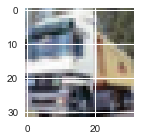

In [22]:
print(y_train1[1][0])
plt.figure(figsize=(2,2))
plt.imshow(x_train1[1]);

In [23]:
# 28x28 grayscale images; 55,000 - the train set; 10,000 - the test set; labeled over 10 categories
mnist_data = mnist.input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [24]:
(x_train2, y_train2), (x_test2, y_test2) = \
(mnist_data.train.images, mnist_data.train.labels), (mnist_data.test.images, mnist_data.test.labels)

In [25]:
(x_train2.shape, y_train2.shape), (x_test2.shape, y_test2.shape)

(((55000, 784), (55000, 10)), ((10000, 784), (10000, 10)))

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


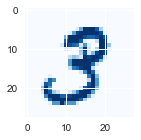

In [26]:
print(y_train2[1])
plt.figure(figsize=(2,2))
plt.imshow(x_train2[1].reshape(28,28), cmap=cm.Blues);

In [27]:
# 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative)
num_words, max_length, embedding_vector_length = 10000, 1000, 32
(x_train3, y_train3), (x_test3, y_test3) = imdb.load_data(path="imdb_full.pkl", num_words=num_words,
                                                          skip_top=0, maxlen=max_length, seed=113,
                                                          start_char=1, oov_char=2, index_from=3)

In [28]:
(x_train3.shape, y_train3.shape), (x_test3.shape, y_test3.shape)

(((25000,), (25000,)), ((24819,), (24819,)))

In [29]:
# 
(x_train4, y_train4), (x_test4, y_test4) =  boston_housing.load_data()

In [30]:
(x_train4.shape, y_train4.shape), (x_test4.shape, y_test4.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

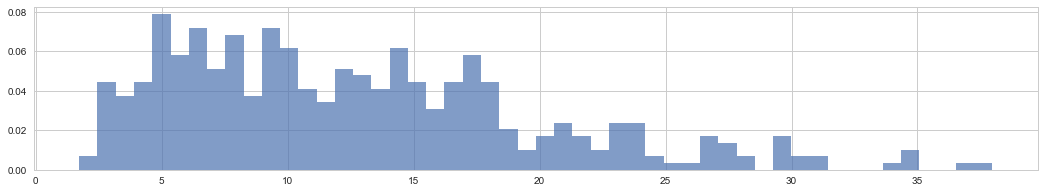

In [31]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18, 3))
plt.hist(y_train4, bins=50, normed=True, alpha=0.7);

In [32]:
# classification; the artificial set; labeled over 2 categories 
X5, Y5 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 1)

In [33]:
(x_train5.shape, y_train5.shape), (x_test5.shape, y_test5.shape)

(((800, 2), (800,)), ((200, 2), (200,)))

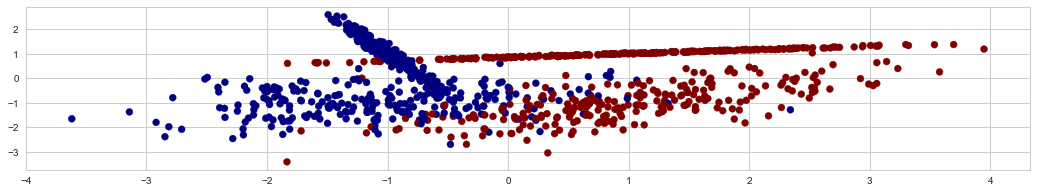

In [34]:
plt.figure(figsize=(18, 3))
plt.scatter(X5[:, 0], X5[:, 1], marker='o', c=Y5, cmap=cm.jet);

## 3. Preprocessing

In [35]:
# Sequence Padding
p_x_train3 = sequence.pad_sequences(x_train3, maxlen=max_length)
p_x_test3 = sequence.pad_sequences(x_test3, maxlen=max_length)

In [36]:
# One-Hot Encoding
c_y_train1 = to_categorical(y_train1, 10)
c_y_test1 = to_categorical(y_test1, 10)

## 4. Models

*Optimizers:*

- 'adam', 'nadam', 
- 'adagrad', 'adadelta', 'adamax',
- 'sgd', 'rmsprop',
- TFOptimizer.

*Loss functions:*

- 'mean_squared_error'('mse'), 'mean_absolute_error'('mae'), 
- 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error',
- 'squared_hinge', 'hinge', 'categorical_hinge',
- 'categorical_crossentropy', 'sparse_categorical_crossentropy',
- 'binary_crossentropy',
- 'kullback_leibler_divergence',
- 'poisson',
- 'cosine_proximity',
- 'logcosh'.

*Metrics:*

- mae, mse, acc,
- binary_accuracy, 
- categorical_accuracy, sparse_categorical_accuracy,
- top_k_categorical_accuracy, sparse_top_k_categorical_accuracy.

----

##### Compilation

*For a multi-class classification problem:*

- model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

*For a binary classification problem:*

- model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
- model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

*For a mean squared error regression problem:*

- model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
- model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
----

##### Activation
*Types:*

- 'elu', 'selu', 'relu', 'tanh', 'linear', 'softmax', 'softplus', 'softsign', 'sigmoid', 'hard_sigmoid'
- LeakyReLU, PReLU, ELU, ThresholdedReLU

*For a multi-class classification problem:*

- 'softmax'

*For a binary classification problem:*

- 'sigmoid'

*For a mean squared error regression problem:*

- 'linear'

##### Layers

- *Core Layers*
  - `Input` layers hold an input tensor (for example, the pixel values of the image with width 32, height 32, and 3 color channels).
  - `Dense` (fully connected) layers compute the class scores, resulting in volume of size. For example, the size [11] corresponds to class scores, such as 10 digits and 1 empty place. Each neuron in these layers are connected to all the numbers in the previous volume.
  - `Activation` applies an activation function to an output. This leaves the size of the volume unchanged.
  - `Dropout` layers consist in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting. This leaves the size of the volume unchanged.
  - `Reshape` layers convert an output to a certain shape.
  - `Flatten` layers flatten the input and collapses it into the one-dimensional feature vector. This results in the volume such as [2, 30, 64] -> [3840].
  - etc.

- *Convolutional Layers*
  - `Conv2D layers` compute the output of neurons that are connected to local regions in the input each computing a dot product between their weights and a small region they are connected to in the input volume. This results in the volume such as [64, 64, 1] -> [64, 64, 32] when it was used 32 filters.

- *Recurrent Layers*

- *Pooling Layers*

- *Advanced Activations Layers*

- etc.

In [37]:
# the basic example (binary classification)
basic_model = Sequential([Dense(16, input_dim=2), Activation('relu'), Dense(1), Activation('sigmoid')])
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
# train the model
basic_model.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=0)
# predict classes
y_train5_predictions = basic_model.predict_classes(x_train5)

 32/800 [>.............................] - ETA: 0s

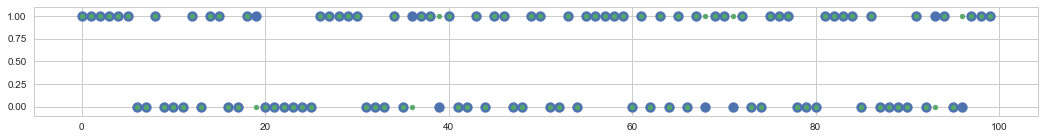

In [39]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_train5[:100], s=100)
plt.scatter(range(100), y_train5_predictions[:100], s=25)

In [40]:
# model performance
basic_score = basic_model.evaluate(x_test5, y_test5, batch_size=200)
basic_score

200/200 [==============================] - 0s


[0.24358490109443665, 0.91500002145767212]

In [41]:
basic_model.input

<tf.Tensor 'dense_1_input:0' shape=(?, 2) dtype=float32>

In [42]:
# model parameters
basic_model.output_shape

(None, 1)

In [43]:
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [44]:
basic_model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 16,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'c

In [45]:
basic_model.get_weights() 

[array([[  1.14994794e-01,   7.40971804e-01,   8.99386585e-01,
          -4.07450944e-01,   2.94178903e-01,  -6.02532387e-01,
          -9.98718083e-01,   2.71358520e-01,   1.05556063e-01,
          -1.16264641e+00,   7.75020421e-02,   1.34263968e+00,
          -1.03764474e+00,   3.16809505e-01,   2.81166047e-01,
           2.78677106e-01],
        [  1.33933183e-02,   2.77992576e-01,  -2.03157246e-01,
          -7.13215619e-02,  -8.58754098e-01,  -1.85627684e-01,
          -1.45962209e-01,  -7.88673759e-01,  -6.95272863e-01,
          -1.34547785e-01,  -2.60396600e-02,   8.37370753e-01,
          -1.03351113e-03,  -7.28389382e-01,  -8.61480474e-01,
          -5.82629621e-01]], dtype=float32),
 array([-0.31003574,  0.46265444,  0.24866888,  0.08661296, -0.55431366,
        -0.41512805,  0.12150027, -0.50935674,  0.58840513,  0.17249312,
        -0.23443536,  0.43791035,  0.13509141, -0.45524761, -0.55908656,
        -0.34777483], dtype=float32),
 array([[-0.07727471],
        [ 1.13152

In [46]:
# optimization

opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-5)
opt2 = keras.optimizers.SGD(lr=0.001, decay=1e-5, momentum=0.9, nesterov=True)

basic_model2 = Sequential([Dense(16, input_dim=2), Activation('relu'), Dense(1), Activation('sigmoid')])
basic_model2.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
basic_model2.fit(x_train5, y_train5, batch_size=8, epochs=100, verbose=0) 

basic_score2 = basic_model2.evaluate(x_test5, y_test5, batch_size=200)
basic_score2

200/200 [==============================] - 0s


[0.26739662885665894, 0.90499997138977051]

In [48]:
# advanced activation

# encoder
inp = Input(shape=(2,))
act = PReLU(alpha_initializer='zeros')
lay = Dense(16, kernel_initializer='uniform', name='encoder')(inp)
lay = act(lay)

# decoder
out = Dense(1, kernel_initializer='uniform', activation='sigmoid', name='decoder')(lay)

# model
basic_model3 = Model(inputs=inp, outputs=out, name='cae')
basic_model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
basic_model3.fit(x_train5, y_train5, epochs=100, batch_size=8, verbose=0)
basic_model3.evaluate(x_test5, y_test5, batch_size=200)

200/200 [==============================] - 0s


[0.25685057044029236, 0.9100000262260437]

In [50]:
# save/reload models
basic_model.save('basic_model_file.h5')
my_basic_model = load_model('basic_model_file.h5')

## 5. Neural Networks
### 5.1 Multi-layer Perceptron

In [44]:
# MLP: Binary Classification
def mlp_bc_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=2, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
    
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [45]:
mlp_bc_model = mlp_bc_model()
mlp_bc_model.fit(x_train5, y_train5, epochs=10, batch_size=8, verbose=0)
y_train5_mlp_predictions = mlp_bc_model.predict_classes(x_train5)
y_test5_mlp_predictions = mlp_bc_model.predict_classes(x_test5)

 32/200 [===>..........................] - ETA: 0s

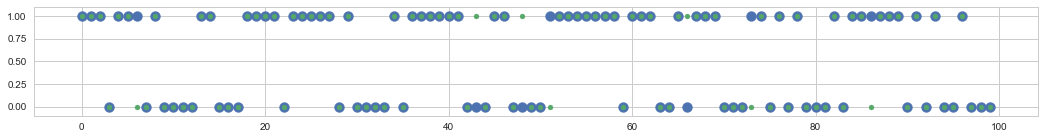

In [46]:
plt.figure(figsize=(18,2))
plt.scatter(range(100), y_test5[:100], s=100)
plt.scatter(range(100), y_test5_mlp_predictions[:100], s=25)

In [47]:
mlp_bc_test_score = mlp_bc_model.evaluate(x_test5, y_test5)
mlp_bc_test_score

 32/200 [===>..........................] - ETA: 0s

[0.27518221259117126, 0.90500000000000003]

In [31]:
# MLP: Multi-Class Classification
def mlp_mc_model():
    model = Sequential()
    
    model.add(Dense(196, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    
    model.add(Dense(784, activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
mlp_mc_model = mlp_mc_model()
mlp_mc_model.fit(x_train2, y_train2, epochs=10, batch_size=8, verbose=0)
y_train2_mlp_predictions = mlp_mc_model.predict_classes(x_train2)
y_test2_mlp_predictions = mlp_mc_model.predict_classes(x_test2)

10000/10000 [==============================] - 1s      

In [48]:
y_test2_class = []

for i in range(10000):
    y_test2_class.append(np.argmax(y_test2[i]))
    
y_test2_class = np.array(y_test2_class)

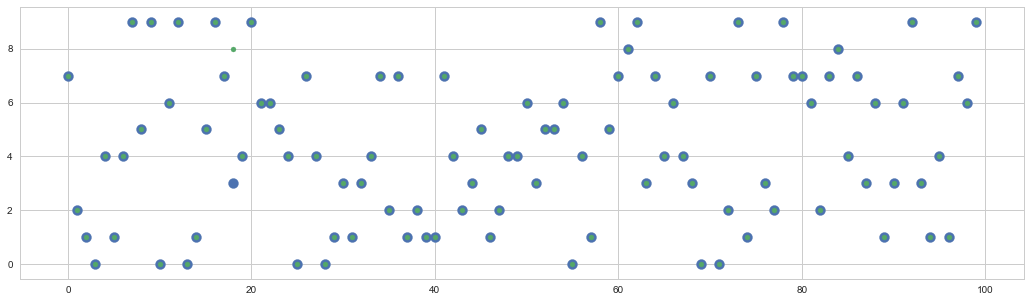

In [132]:
plt.figure(figsize=(18,5))
plt.scatter(range(100), y_test2_class[:100], s=100)
plt.scatter(range(100), y_test2_mlp_predictions[:100], s=25);

In [54]:
mlp_mc_test_score = mlp_mc_model.evaluate(x_test2, y_test2)
mlp_mc_test_score

 9664/10000 [===========================>..] - ETA: 0s  

[0.10468304518835775, 0.97789999999999999]

In [124]:
# MLP: Regression
def mlp_reg_model():
    model = Sequential()
    
    model.add(Dense(13, activation='relu', input_dim=13))    
    model.add(Dense(104, activation='relu'))   
    model.add(Dense(416, activation='relu'))
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    
    return model

In [125]:
mlp_reg_model = mlp_reg_model()
mlp_reg_history = mlp_reg_model.fit(x_train4, y_train4, epochs=100, batch_size=16, verbose=0,
                                    validation_data=(x_test4, y_test4))
y_train4_mlp_predictions = mlp_reg_model.predict(x_train4)
y_test4_mlp_predictions = mlp_reg_model.predict(x_test4)

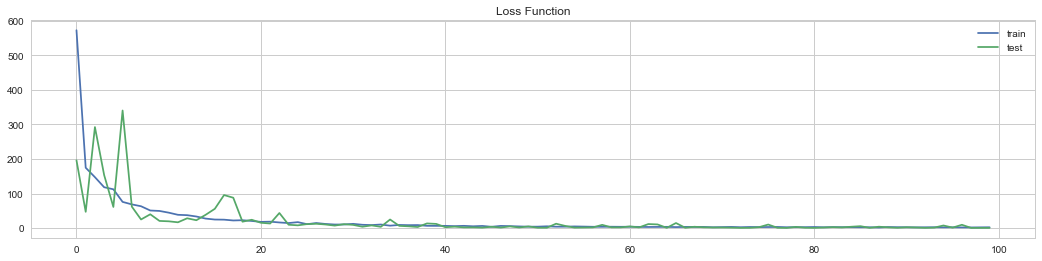

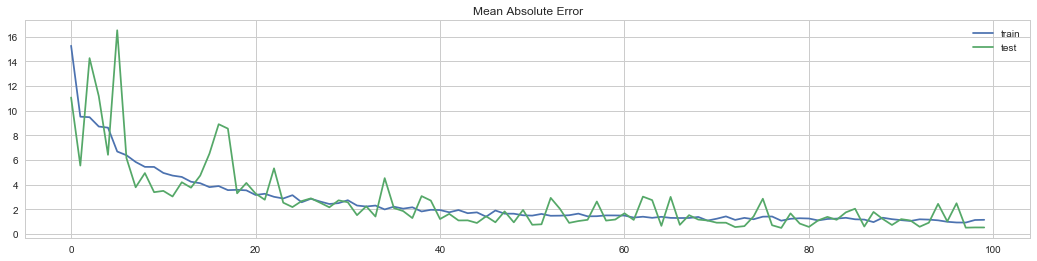

In [127]:
loss_plot(mlp_reg_history)
mae_plot(mlp_reg_history)

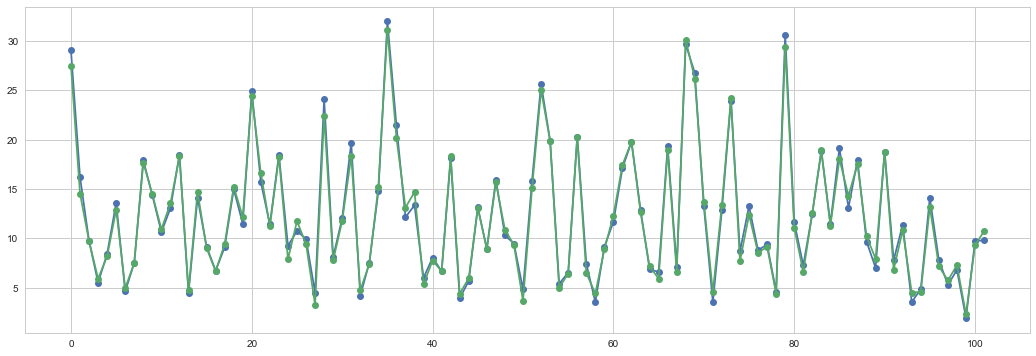

In [128]:
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_mlp_predictions, '-o', label = 'predictions');

In [129]:
mlp_reg_test_score = mlp_reg_model.evaluate(x_test4, y_test4, batch_size=102)
mlp_reg_test_score

102/102 [==============================] - 0s


[0.45933929085731506, 0.54101449251174927]

### 5.2 Convolutional Neural Network (CNN)

In [ ]:
# CNN: Binary Classification
def cnn_bc_model():
    model = Sequential()

    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# CNN: LSTM For Sequence Classification
def cnn_lstm_model():
    model = Sequential()

    model.add(Embedding(num_words3, embedding_vector_length3, input_length=max_length3))

    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(LSTM(100))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [165]:
# VGG-like CNN: Multi-Class Classification
def cnn_vgg_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train1.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [166]:
cnn_vgg_model = cnn_vgg_model()
cnn_vgg_history = cnn_vgg_model.fit(x_train1, c_y_train1, epochs=50, batch_size=64, verbose=2,
                                    validation_data=(x_test1, c_y_test1))
y_train1_cnn_predictions = cnn_vgg_model.predict_classes(x_train1)
y_test1_cnn_predictions = cnn_vgg_model.predict_classes(x_test1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
382s - loss: 2.9090 - acc: 0.2978 - val_loss: 1.4964 - val_acc: 0.4670
Epoch 2/50
413s - loss: 1.5024 - acc: 0.4611 - val_loss: 1.3398 - val_acc: 0.5187
Epoch 3/50
460s - loss: 1.3309 - acc: 0.5260 - val_loss: 1.3110 - val_acc: 0.5477
Epoch 4/50
394s - loss: 1.2210 - acc: 0.5659 - val_loss: 1.1132 - val_acc: 0.6123
Epoch 5/50
358s - loss: 1.1355 - acc: 0.5996 - val_loss: 1.1051 - val_acc: 0.6057
Epoch 6/50
360s - loss: 1.0700 - acc: 0.6248 - val_loss: 1.0343 - val_acc: 0.6359
Epoch 7/50
396s - loss: 1.0189 - acc: 0.6450 - val_loss: 1.0257 - val_acc: 0.6436
Epoch 8/50
353s - loss: 0.9774 - acc: 0.6606 - val_loss: 1.0352 - val_acc: 0.6413
Epoch 9/50
352s - loss: 0.9364 - acc: 0.6756 - val_loss: 0.9448 - val_acc: 0.6716
Epoch 10/50
351s - loss: 0.9002 - acc: 0.6874 - val_loss: 1.0244 - val_acc: 0.6525
Epoch 11/50
350s - loss: 0.8789 - acc: 0.6959 - val_loss: 0.8588 - val_acc: 0.7060
Epoch 12/50
353s - loss: 0.8500 - acc: 0.7076 

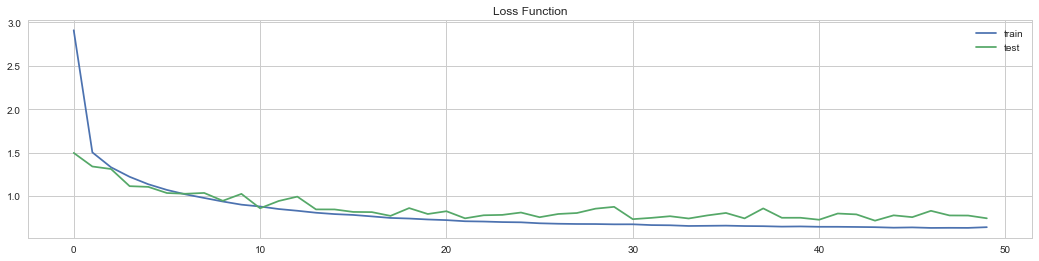

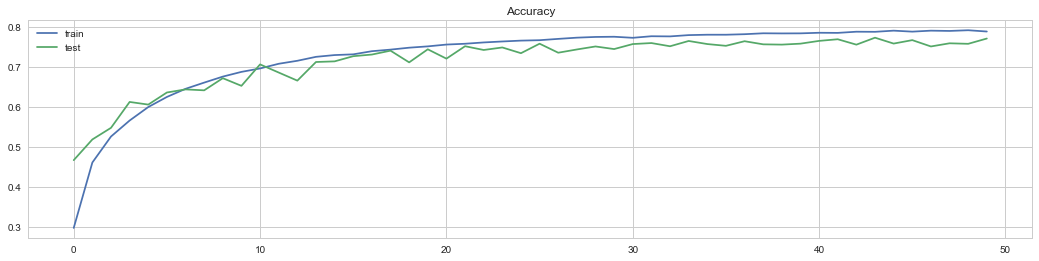

In [167]:
loss_plot(cnn_vgg_history)
acc_plot(cnn_vgg_history)

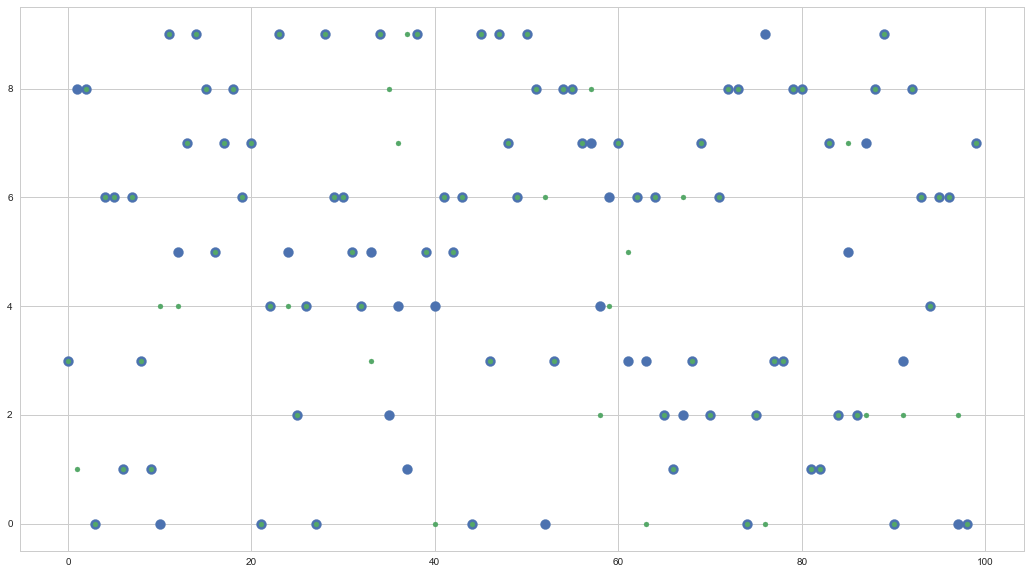

In [168]:
plt.figure(figsize=(18,10))
plt.scatter(range(100), y_test1[:100], s=100)
plt.scatter(range(100), y_test1_cnn_predictions[:100], s=25);

In [169]:
cnn_vgg_test_score = cnn_vgg_model.evaluate(x_test1, c_y_test1)
cnn_vgg_test_score

10000/10000 [==============================] - 26s      

[0.74313305077552794, 0.77059999999999995]

In [87]:
x_train4.shape, x_test4.shape

((404, 13), (102, 13))

In [200]:
# CNN: Regression
def cnn_reg_model():
    model = Sequential()
    
    model.add(Conv1D(13, 4, padding='valid', activation='relu', input_shape=(13,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(104, 4, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    
    model.add(Flatten())

    model.add(Dense(416, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model    

In [201]:
cnn_reg_model = cnn_reg_model()
cnn_reg_history = cnn_reg_model.fit(x_train4.reshape(404, 13, 1), y_train4, epochs=200, batch_size=16, verbose=0,
                                    validation_data=(x_test4.reshape(102, 13, 1), y_test4))
y_train4_cnn_predictions = cnn_reg_model.predict(x_train4.reshape(404, 13, 1))
y_test4_cnn_predictions = cnn_reg_model.predict(x_test4.reshape(102, 13, 1))

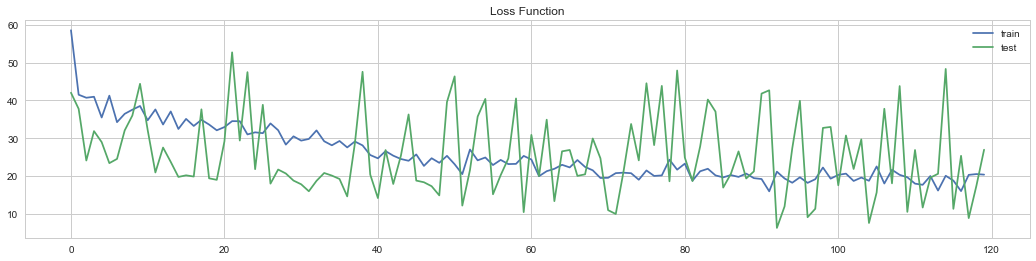

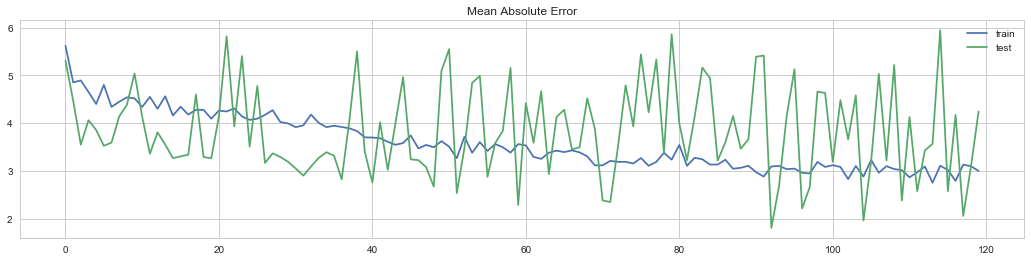

In [198]:
loss_plot(cnn_reg_history)
mae_plot(cnn_reg_history)

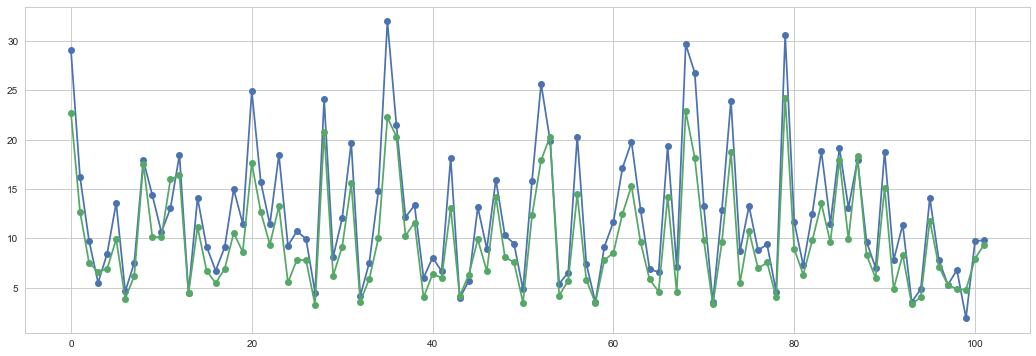

In [202]:
plt.figure(figsize=(18,6))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_cnn_predictions, '-o', label = 'predictions');

### 5.3 Recurrent Neural Network (RNN)

In [ ]:
# RNN: Binary Classification
def rnn_bc_model():
    model = Sequential()

    model.add(Embedding(2010, 100))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])     
    
    return model 

In [ ]:
# RNN: Multi-Class Classification
def rnn_mc_model():
    model = Sequential()
    
    return model 

In [ ]:
# RNN: Regression
def rnn_reg_model():
    model = Sequential()
    
    model.add(LSTM(input_shape = (13,), input_dim=13, output_dim=52, return_sequences=True))
    model.add(LSTM(input_shape = (52,), input_dim=13, output_dim=208, return_sequences=False))   
    
    model.add(Dense(1))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) 
    
    return model 

In [ ]:
rnn_reg_odel = rnn_model()

rnn_reg_history = rnn_model.fit(x_train4, y_train4, validation_data=(x_test4,y_test4), nb_epoch=3, verbose=1)